In [1]:
'''Aim - The main idea behind the dataset is to predict the Sales of product in Big Mart.
Author - Prajwal Ghadi
Date - 24-11-2021'''

'Aim - The main idea behind the dataset is to predict the Sales of product in Big Mart.\nAuthor - Prajwal Ghadi\nDate - 24-11-2021'

In [2]:
'''Importing Basics Libraries for Cleaning and transforming the data'''

'Importing Basics Libraries for Cleaning and transforming the data'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
'''Reading Dataset using pandas'''

'Reading Dataset using pandas'

In [5]:
Train_data = pd.read_csv("D:/Machine Learning Projects Files/Big Mart Prediction/train_data.csv")
Train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
Train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
'''Imputing Item_Weight using mean because its having Numerical Data 
And For Outlet_Size having Categorical Data so we will use Mode'''

'Imputing Item_Weight using mean because its having Numerical Data \nAnd For Outlet_Size having Categorical Data so we will use Mode'

In [8]:
Train_data["Item_Weight"].fillna(Train_data["Item_Weight"].mean(), inplace = True)
Train_data["Outlet_Size"].fillna(Train_data["Outlet_Size"].mode()[0], inplace = True)
Train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [9]:
'''Now Converting Categorical Data into Numerical Data'''

'Now Converting Categorical Data into Numerical Data'

In [10]:
Train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [11]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [12]:
LE = LabelEncoder()
cols = ["Item_Identifier", "Item_Fat_Content", "Item_Visibility", "Item_Type",
                         "Outlet_Identifier", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type"]
for i in cols:
    Train_data[i] = LE.fit_transform(Train_data[i])
    
Train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,664,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,880,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,715,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,1,0,9,53.8614,1,1987,0,2,1,994.7052


In [13]:
'''Now using Standard Scaler we are going to Scale the Columns'''

'Now using Standard Scaler we are going to Scale the Columns'

In [14]:
SC = StandardScaler()
Train_data["Item_MRP"] = SC.fit_transform(np.array(Train_data["Item_MRP"]).reshape(-1, 1))
Train_data.Item_MRP.head()

0    1.747454
1   -1.489023
2    0.010040
3    0.660050
4   -1.399220
Name: Item_MRP, dtype: float64

In [15]:
'''Model Building'''

'Model Building'

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [17]:
'''Spliting Data in X & Y'''

'Spliting Data in X & Y'

In [18]:
X = Train_data.drop("Item_Outlet_Sales", axis = "columns")
y = Train_data.Item_Outlet_Sales

In [19]:
'''Spliting Data using Train_Test_Split'''

'Spliting Data using Train_Test_Split'

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [21]:
model_lr = LinearRegression()
model_RFR = RandomForestRegressor(max_depth = 10, random_state = 2)

models = [model_lr, model_RFR]

for i in models:

    def model_Calculator(i):
        i.fit(X_train, y_train)
        test_predict = i.predict(X_test)
        print(i.score(X_train, y_train))
        print("MeanSquaredError for ", i, " is ", mean_squared_error(y_test, test_predict) ** 0.5)
    
    model_Calculator(i)

0.5098741161979486
MeanSquaredError for  LinearRegression()  is  1213.8891844659556
0.7318640342267
MeanSquaredError for  RandomForestRegressor(max_depth=10, random_state=2)  is  1131.927626721756


In [22]:
'''Feature Importance'''

'Feature Importance'

<AxesSubplot:>

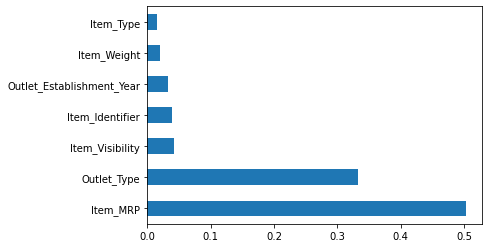

In [23]:
feature_importance = pd.Series(model_RFR.feature_importances_, index = X_test.columns)
feature_importance.nlargest(7).plot(kind = 'barh')